In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
from random import sample 
import scipy.misc 
import matplotlib.cm as cm 
from scipy import linalg 
import imageio
from scipy.io import loadmat

In [2]:
def distSquared(p1, p2):
    assert p1.shape == p2.shape
    return np.sum(np.square(p2-p1))

In [3]:
def findClosestCentroids(monX, moncentroids):
    idxn = np.zeros((monX.shape[0],1))
    for x in range(idxn.shape[0]):
        monpoint = monX[x]
        mindist, idx = 9999999, 0
        for i in range(moncentroids.shape[0]):
            moncentroid = moncentroids[i]
            distsquared = distSquared(moncentroid,monpoint)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        idxn[x] = idx
        
    return idxn

In [4]:
datafile = 'data.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']

In [5]:
K = 3
#choisir les centreoide initiale
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [6]:
#Visualizer data
def plotData(monX,moncentroids,monidxs = None):
    colors = ['r','g','b','darkorange','salmon','olivedrab']
    
    assert monX[0].shape == moncentroids[0][0].shape
    assert moncentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if monidxs is not None:
        assert monidxs.shape[0] == monX.shape[0]
        subX = []
        for x in range(moncentroids[0].shape[0]):
            subX.append(np.array([monX[i] for i in range(monX.shape[0]) if monidxs[i] == x]))
    else:
        subX = [monX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Dessiner un historique du mouvement du centroïde
    tempx, tempy = [], []
    for moncentroid in moncentroids:
        tempx.append(moncentroid[:,0])
        tempy.append(moncentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'kx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

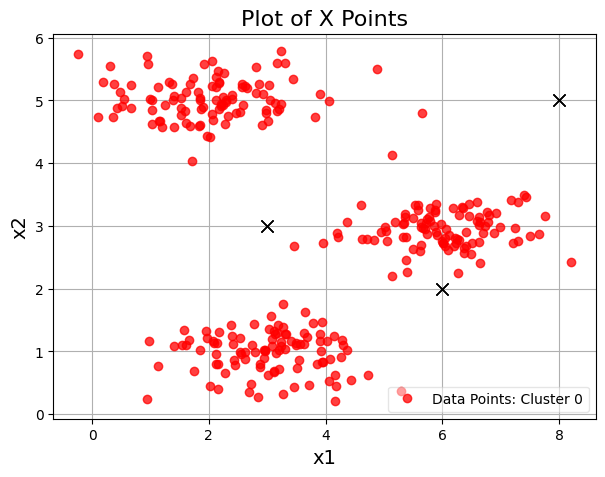

In [7]:
plotData(X,[initial_centroids])

In [8]:
idxs = findClosestCentroids(X,initial_centroids)

print(idxs[:3].flatten())

[0. 2. 1.]


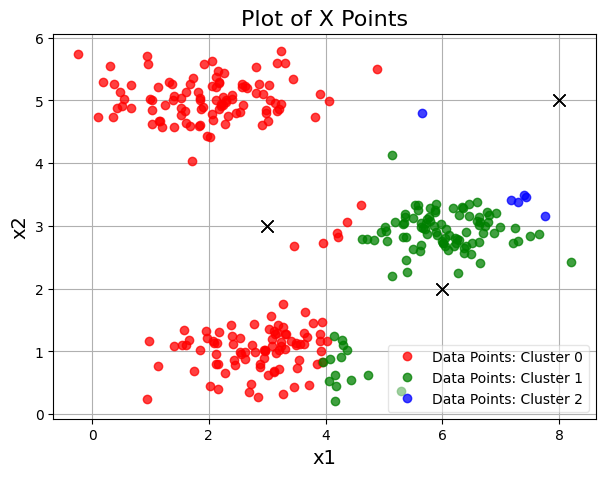

In [9]:
plotData(X,[initial_centroids],idxs)

In [10]:
def runKMeans(myX, initial_centroids, K, n_iter):
    """
    fonction pour les iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX,current_centroids)
        current_centroids = computeCentroids(myX,idxs)
        
    return idxs, centroid_history

In [11]:
def computeCentroids(myX, myidxs):
    
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

In [12]:
idxs, centroid_history = runKMeans(X,initial_centroids,K=3,n_iter=10)

In [13]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])

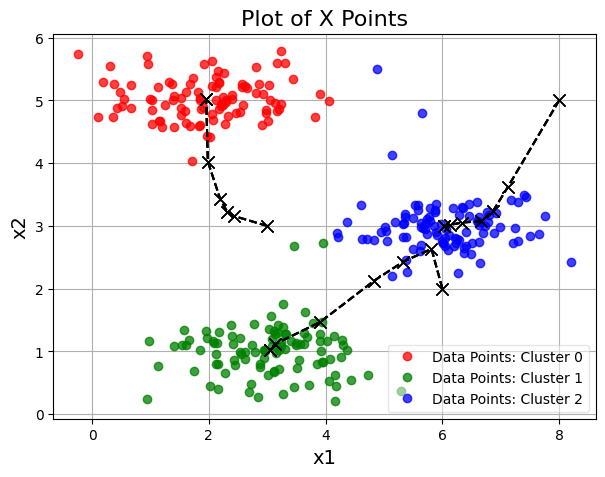

In [14]:
plotData(X,centroid_history,idxs)

shape  (128, 128, 3)


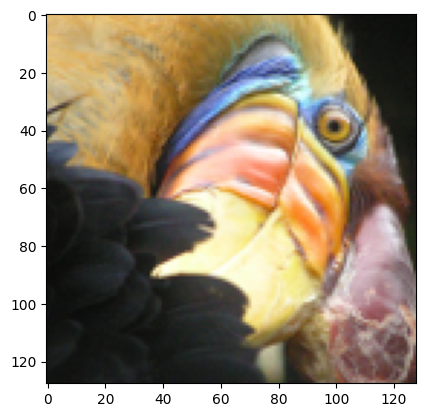

In [15]:
datafile = 'bird_small.png'

# This creates a three-dimensional matrix A whose first two indices 
# identify a pixel position and whose last index represents red, green, or blue.
A = imageio.v2.imread(datafile)

print("shape ",A.shape)
dummy = plt.imshow(A)

In [16]:
A = A / 255.

A = A.reshape(-1, 3)

# Exécutez k-means sur ces données, formant 16 clusters, avec une initialisation aléatoire
myK = 16
idxs, centroid_history = runKMeans(A,chooseKRandomCentroids(A,myK), myK,n_iter=10)

In [17]:
idxs = findClosestCentroids(A, centroid_history[-1])

In [18]:
final_centroids = centroid_history[-1]
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

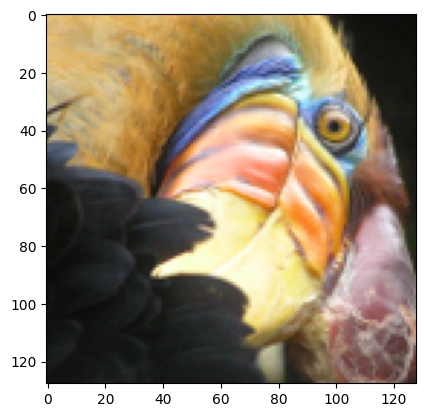

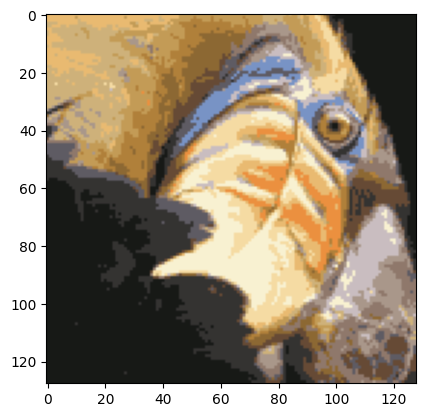

In [19]:
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
plt.figure()
dummy = plt.imshow(final_image.reshape(128,128,3))